In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import seaborn as sns
rcParams['figure.figsize']=10,8
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df=pd.read_excel('data/data.xlsx')

In [3]:
df.head()

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,1080,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,1140,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,1200,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,1260,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,1320,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [4]:
(df[['Time', 'CO(GT)','PT08.S1(CO)', 'NMHC(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)','T','RH','AH']] == -200).sum()

Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [5]:
df.drop('PT08.S1(CO)', axis=1, inplace=True)
df.drop('NMHC(GT)', axis=1, inplace=True)

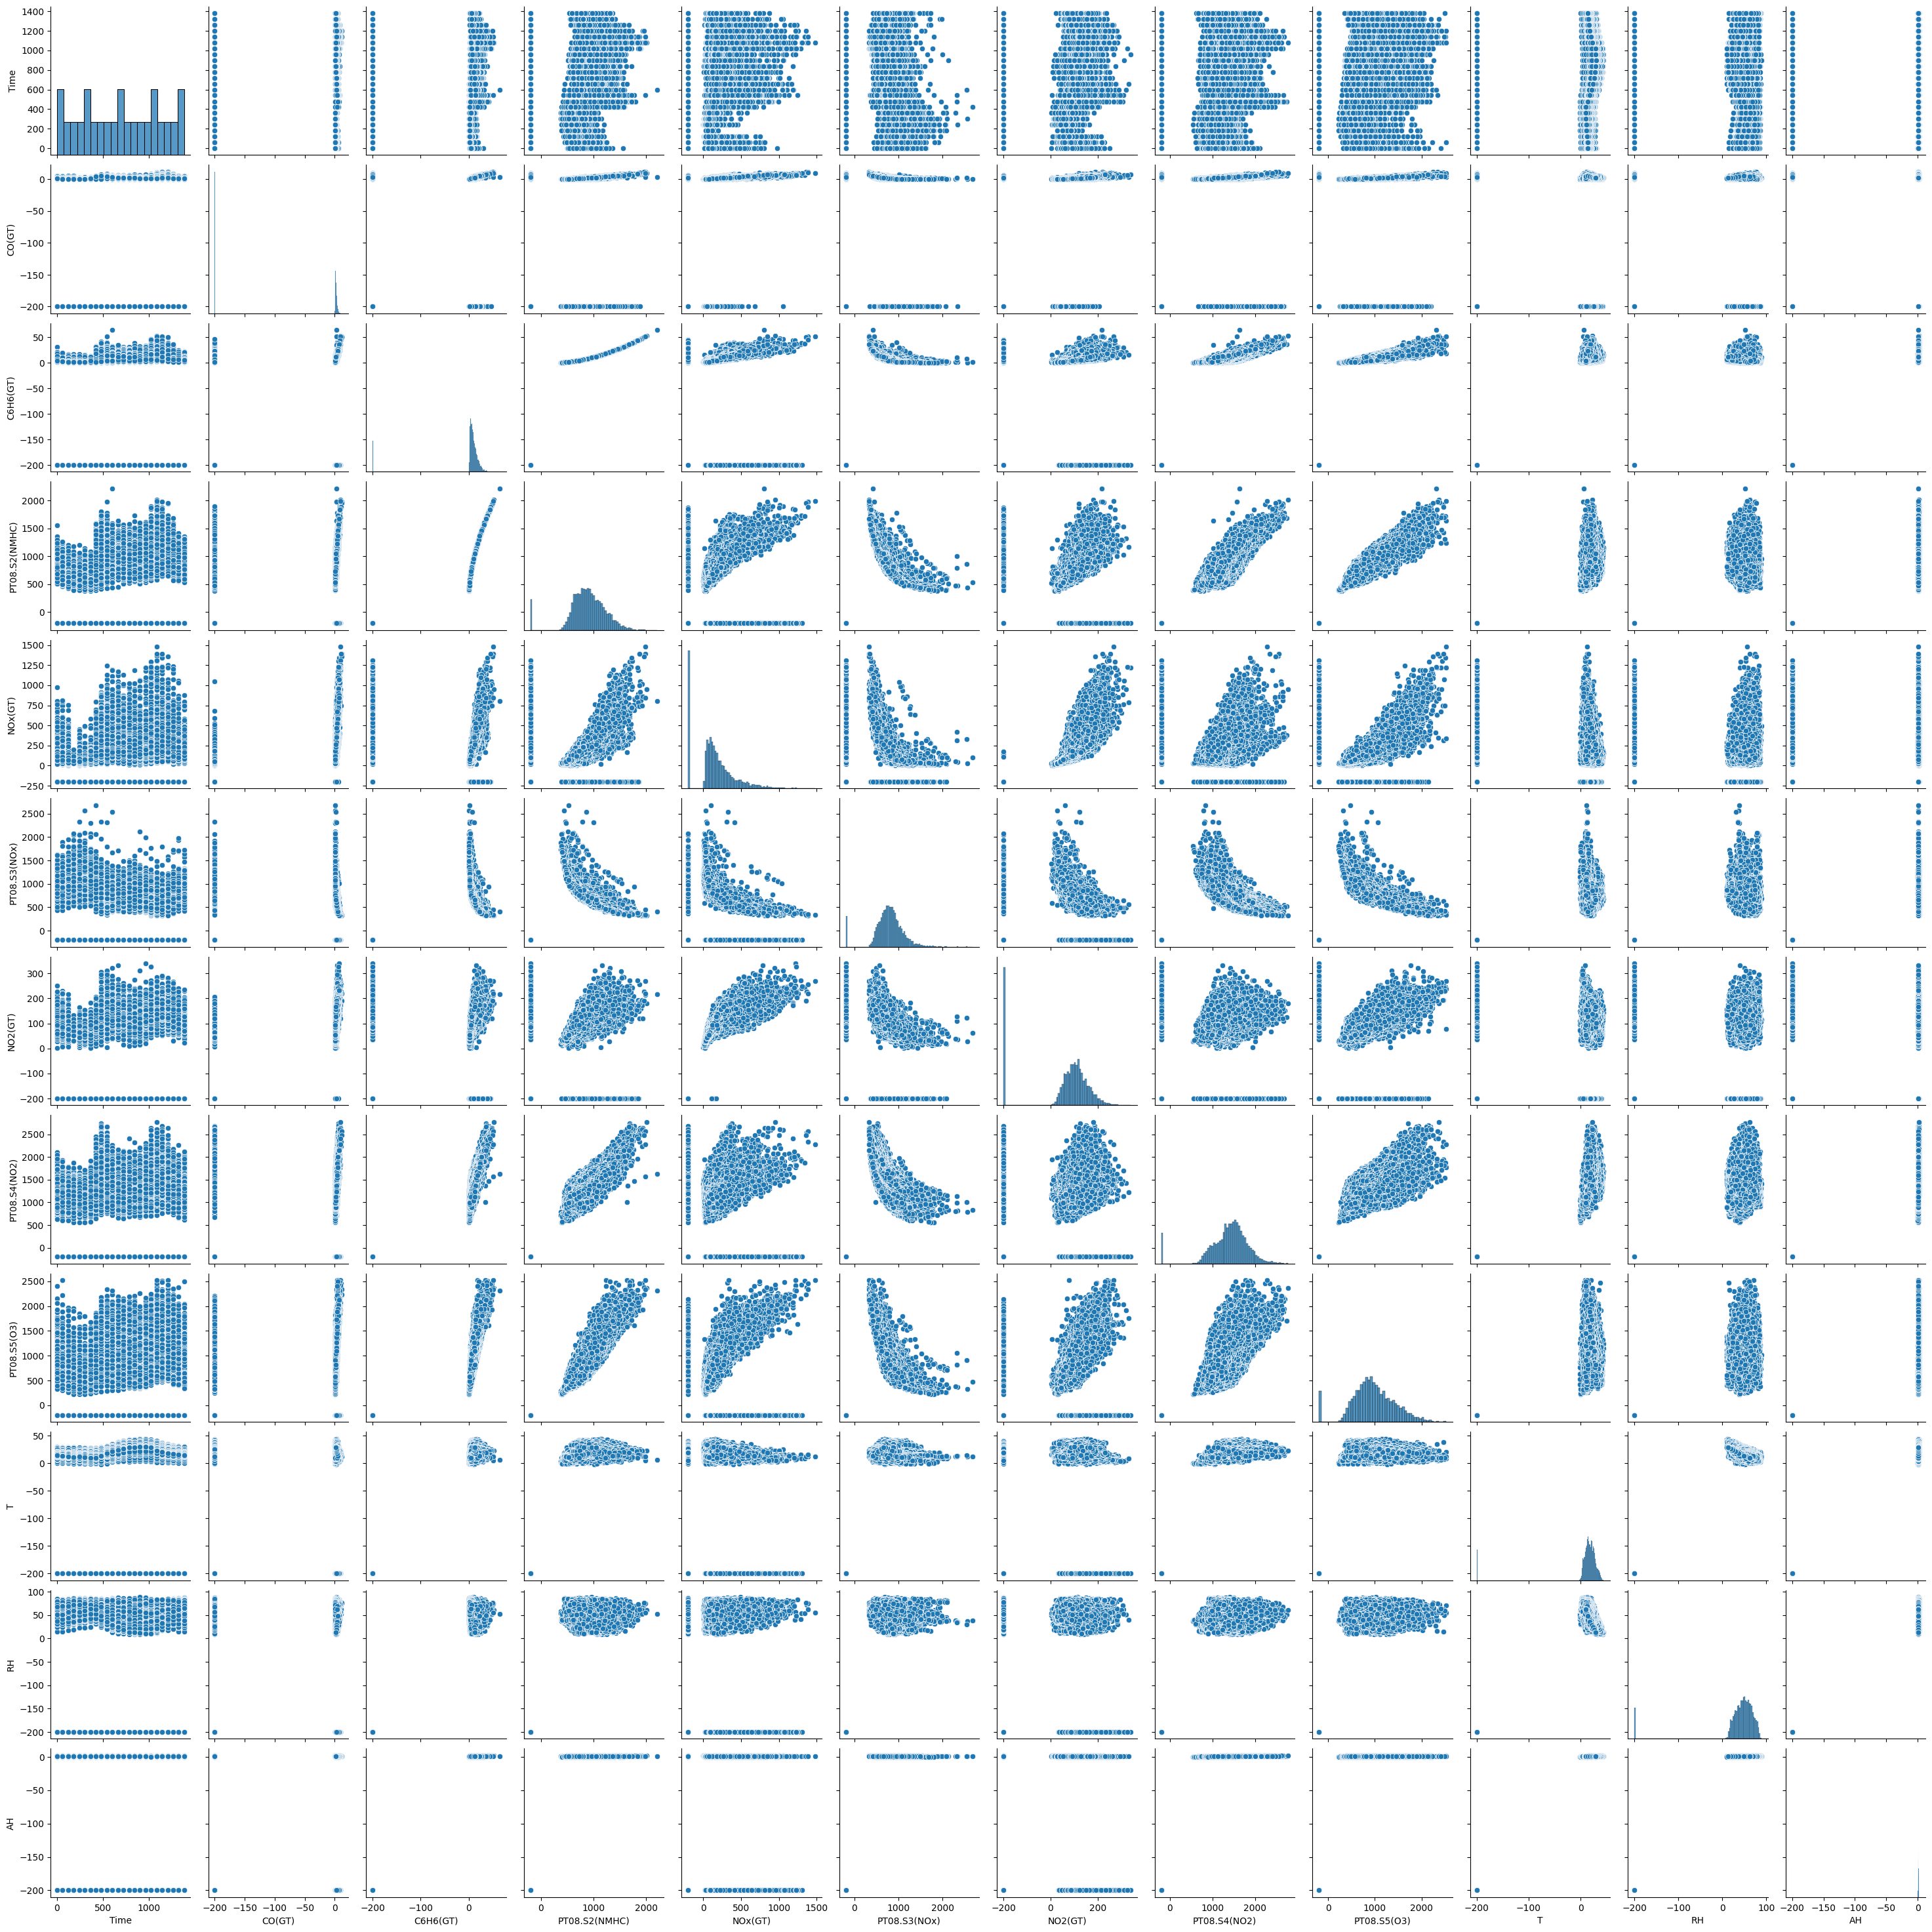

In [6]:
sns.pairplot(df)

In [7]:
lm=LinearRegression()

In [8]:
x=df[['Time', 'CO(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)','T','AH']]

y= df['RH']

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33, random_state=42)

In [ ]:
lm.fit(x_train,y_train)

LinearRegression()

In [ ]:
prediction = lm.predict(x_test)

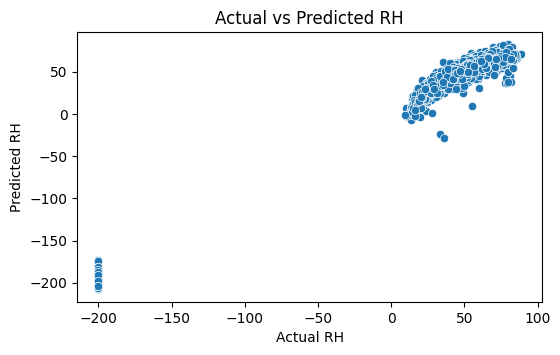

In [ ]:
fig_dims = (6,3.5)
fig, ax = plt.subplots(figsize=fig_dims)

sns.scatterplot(x=y_test, y=prediction, ax=ax)

plt.xlabel("Actual RH")
plt.ylabel("Predicted RH")
plt.title("Actual vs Predicted RH")
plt.show()

In [ ]:
print('accuracy of your prediction are',end=' ')
print(r2_score(y_test,prediction)*100,end='')
print('%')

accuracy of your prediction are 97.4882672014979%


In [ ]:
import pickle

In [ ]:
filename='model/AirQualityPredictor.sav'

In [ ]:
pickle.dump(lm, open(filename, 'wb'))